In [24]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🧠 Neural Network from Scratch
Welcome to the brainy adventure of building a neural network from scratch!  

In this notebook, we are going to:
- Implement a neural network **without using fancy libraries** like TensorFlow or PyTorch (just raw Python + NumPy 🐍).
- Train it, test it, and maybe even make it do a little dance. 💃

**Imports explained:**
- `numpy` → for numerical operations (aka the math wizard 🧙‍♂️)
- `pandas` → for data manipulation (spreadsheets in Python style 📊)
- `matplotlib.pyplot` → for plotting graphs and making our data look pretty 📈

Let's get nerdy! 🤓


In [25]:
# Load MNIST dataset from CSV
data = pd.read_csv("MNIST.csv")

# Peek at the first 5 rows to understand the structure
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 📥 Loading the Data
Here we are bringing in the famous **MNIST dataset** — a bunch of handwritten digits (0–9) that our neural network will try to recognize.  

- `pd.read_csv("MNIST.csv")` loads the dataset into a **DataFrame** (think of it like a super-powered Excel sheet).  
- `data.head()` shows the **first 5 rows** so we can peek at what we’re dealing with.  

Basically, this is like opening the fridge to see what snacks we have before we start cooking. 🍕🥤


In [26]:
# Convert DataFrame to NumPy array for easier numerical processing
data = np.array(data)

# Get number of examples (m) and number of features (n)
m, n = data.shape

# Shuffle the dataset randomly to avoid any order bias
np.random.shuffle(data)


## 🔄 Converting and Shuffling the Data
Before we feed our digits into the neural network, we need to do a couple of things:

1. **Convert to NumPy array** – easier for math operations (NumPy is basically the calculator we love 🧮).  
2. **Get shape** – `m` = number of examples, `n` = number of features + label (rows × columns).  
3. **Shuffle the data** – makes sure our training isn’t biased by the original order. We don’t want our network to think all zeros come first and all nines come last… that would be rude. 😅


In [27]:
# Development set (first 1000 examples)
data_dev = data[0:1000].T
Y_dev = data_dev[0]        # Labels
X_dev = data_dev[1:n]      # Features
X_dev = X_dev / 255.        # Normalize pixel values

# Training set (remaining examples)
data_train = data[1000:m].T
Y_train = data_train[0]     # Labels
X_train = data_train[1:n]   # Features
X_train = X_train / 255.    # Normalize pixel values

# Get number of features and number of training examples
_, m_train = X_train.shape


## 🧩 Splitting the Data into Training and Development Sets
Now we’re preparing our data for the neural network:  

1. **Development set (`dev`)**: 1,000 examples used to **validate** our model during development.  
2. **Training set (`train`)**: the rest of the examples used to **teach** the model.  

Steps explained:  
- `.T` transposes the data so that each column is an example (common format for neural networks).  
- `Y_*` stores the labels (digits 0–9).  
- `X_*` stores the features (pixel values).  
- Dividing by 255 normalizes pixel values to the [0, 1] range — makes training faster and more stable.  
- `_, m_train` stores the number of features and number of training examples.


In [28]:
def init_params():
    # Weights for layer 1 (10 neurons, 784 input features)
    W1 = np.random.rand(10,784) - 0.5
    # Biases for layer 1
    b1 = np.random.rand(10,1) - 0.5
    
    # Weights for layer 2 (10 neurons, 10 inputs from previous layer)
    W2 = np.random.rand(10,10) - 0.5
    # Biases for layer 2
    b2 = np.random.rand(10,1) - 0.5
    
    return W1, b1, W2, b2


## 🎯 Initializing the Parameters
Here we’re giving our neural network its starting gear.  

- `W1` and `b1` → weights and biases for the **first layer** (input → hidden or in this case input → “digit space”).  
- `W2` and `b2` → weights and biases for the **second layer** (hidden → output).  
- Subtracting 0.5 centers the random numbers around 0, so the network doesn’t start off too biased.  

Basically, it’s like giving your network a random backpack before it starts school. 🎒


In [29]:
# ReLU activation: sets negative values to 0
def ReLU(Z):
    return np.maximum(Z,0)

# Softmax activation: converts scores to probabilities
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward propagation: compute outputs of each layer
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1      # Linear step for layer 1
    A1 = ReLU(Z1)            # Activation for layer 1
    Z2 = W2.dot(A1) + b2     # Linear step for layer 2
    A2 = softmax(Z2)         # Activation for layer 2 (output probabilities)
    return Z1, A1, Z2, A2

# Derivative of ReLU (needed for backpropagation)
def ReLU_deriv(Z):
    return Z > 0


## ⚡ Activation Functions & Forward Propagation

Before our network can do its magic, it needs some special moves:

1. **ReLU (Rectified Linear Unit)**  
   - `ReLU(Z)` = max(Z, 0)  
   - Simple, fast, and prevents negative neurons from being lazy. 💪  

2. **Softmax**  
   - Converts raw scores into **probabilities** for each digit class.  
   - Each column of the output sums to 1 (like dividing a pie 🍰 fairly among the classes).  

3. **Forward Propagation (`forward_prop`)**  
   - Computes outputs of each layer using weights, biases, and activations.  
   - Returns intermediate results (`Z1, A1, Z2, A2`) which will be useful for backpropagation later.  

4. **ReLU Derivative (`ReLU_deriv`)**  
   - Needed for backpropagation. Returns 1 if the neuron is active, 0 otherwise.  
   - Think of it as a “neuron on/off switch.” 🔛🔘


In [31]:
# One-hot encode labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Initialize matrix of zeros
    one_hot_Y[np.arange(Y.size), Y] = 1          # Set correct class to 1
    one_hot_Y = one_hot_Y.T                      # Transpose for consistency
    return one_hot_Y

# Backward propagation: compute gradients
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)                       # Convert labels
    dZ2 = A2 - one_hot_Y                         # Error at output layer
    dW2 = 1 / m * dZ2.dot(A1.T)                  # Gradient for W2
    db2 = 1 / m * np.sum(dZ2)                    # Gradient for b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)         # Error at hidden layer
    dW1 = 1 / m * dZ1.dot(X.T)                   # Gradient for W1
    db1 = 1 / m * np.sum(dZ1)                    # Gradient for b1
    return dW1, db1, dW2, db2

# Update parameters using gradients
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


## 🔄 Backpropagation & Parameter Updates

Here’s where the network actually **learns** from its mistakes:  

1. **One-Hot Encoding (`one_hot`)**  
   - Converts labels into a format the network loves: a vector where the correct class is 1 and the rest are 0.  
   - Example: `3` → `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  

2. **Backward Propagation (`backward_prop`)**  
   - Computes gradients of the loss with respect to weights and biases.  
   - Uses the chain rule to figure out how much each neuron contributed to the error.  
   - `dZ`, `dW`, `db` → derivatives used to adjust parameters.  

3. **Parameter Update (`update_params`)**  
   - Moves weights and biases in the **opposite direction of the gradient** to minimize loss.  
   - `alpha` is the learning rate — how big the steps are (too big → trip and fall, too small → slow crawl 🐌).  

Basically, this is the “network hitting the gym” phase — weights get stronger and smarter with each iteration. 🏋️‍♂️


In [32]:
# Returns predicted class (index of max probability)
def get_predictions(A2):
    return np.argmax(A2, 0)
    
# Computes accuracy of predictions
def get_accuracy(predictions, Y):
    print(predictions, Y)             # Optional: see predicted vs true labels
    return np.sum(predictions == Y) / Y.size  # Fraction correct


## 🎯 Predictions & Accuracy

After all that learning, it’s time to see how our network performs:  

1. **Get Predictions (`get_predictions`)**  
   - Chooses the class with the **highest probability** from softmax output.  
   - Example: if `A2 = [0.1, 0.7, 0.2]` → prediction = `1`  

2. **Get Accuracy (`get_accuracy`)**  
   - Compares predicted labels with true labels.  
   - Returns the proportion of correctly predicted examples (a simple “how good are we?” metric).  

Think of it as the network taking a mini exam after all that studying 📚.  


In [33]:
def gradient_descent(X, Y, alpha, iterations):
    # Initialize weights and biases
    W1, b1, W2, b2 = init_params()
    
    # Training loop
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        
        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        # Print progress every 10 iterations
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    
    return W1, b1, W2, b2


## 🏋️ Training the Neural Network (Gradient Descent)

Here we put everything together and actually **train the network** using gradient descent:

1. **Initialize parameters** (`init_params`)  
   - Random starting weights and biases.  

2. **Loop over iterations**  
   - `forward_prop`: compute outputs.  
   - `backward_prop`: compute gradients.  
   - `update_params`: adjust weights & biases.  

3. **Monitor training**  
   - Every 10 iterations, print **iteration number** and **current accuracy**.  
   - Helps us see if the network is learning and not just sitting there napping 😴.  

The parameter `alpha` is the learning rate — step size for updating weights. Too big → chaos, too small → slowpoke. 🐢


In [34]:
# Train the network and get trained parameters
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 4 7 ... 1 7 5] [6 9 0 ... 5 4 8]
0.06195121951219512
Iteration:  10
[4 0 5 ... 0 0 2] [6 9 0 ... 5 4 8]
0.17014634146341465
Iteration:  20
[4 4 5 ... 0 0 4] [6 9 0 ... 5 4 8]
0.2118780487804878
Iteration:  30
[4 4 5 ... 0 0 4] [6 9 0 ... 5 4 8]
0.26765853658536587
Iteration:  40
[4 4 5 ... 5 0 4] [6 9 0 ... 5 4 8]
0.32526829268292684
Iteration:  50
[4 4 5 ... 5 0 4] [6 9 0 ... 5 4 8]
0.3828536585365854
Iteration:  60
[4 4 5 ... 5 6 4] [6 9 0 ... 5 4 8]
0.4440731707317073
Iteration:  70
[4 4 5 ... 5 6 9] [6 9 0 ... 5 4 8]
0.5178048780487805
Iteration:  80
[4 4 5 ... 5 2 9] [6 9 0 ... 5 4 8]
0.5704390243902439
Iteration:  90
[6 4 5 ... 5 2 9] [6 9 0 ... 5 4 8]
0.6071219512195122
Iteration:  100
[6 4 0 ... 5 2 8] [6 9 0 ... 5 4 8]
0.6342682926829268
Iteration:  110
[6 4 0 ... 5 2 8] [6 9 0 ... 5 4 8]
0.6585853658536586
Iteration:  120
[6 4 0 ... 5 2 8] [6 9 0 ... 5 4 8]
0.6777317073170732
Iteration:  130
[6 4 0 ... 5 2 8] [6 9 0 ... 5 4 8]
0.6939756097560975
Iteration:  1

## 🚀 Training Time!

Now we actually **train the network** on the training set:  

- `X_train` & `Y_train` → our input features and labels.  
- `0.10` → learning rate (`alpha`).  
- `500` → number of iterations.  

After this runs, `W1, b1, W2, b2` will hold the **trained parameters**.  
Get ready to see some digits finally being recognized! 🎉


In [ ]:
# Predict labels for input data
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Test network prediction for a single example
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]                 # Select image column
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]                                  # True label
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshape image for visualization and plot
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## 🔍 Making Predictions & Visualizing Digits

Here we test our network on individual examples:  

1. **`make_predictions(X, W1, b1, W2, b2)`**  
   - Computes the network output for input `X` and returns predicted labels.  

2. **`test_prediction(index, W1, b1, W2, b2)`**  
   - Picks a single example from the training set by `index`.  
   - Prints the network’s prediction and the true label.  
   - Visualizes the digit so we can see what the network is looking at. 🖼️  

Basically, this is the network showing off its homework and we’re grading it. 🎓


Prediction:  [6]
Label:  6


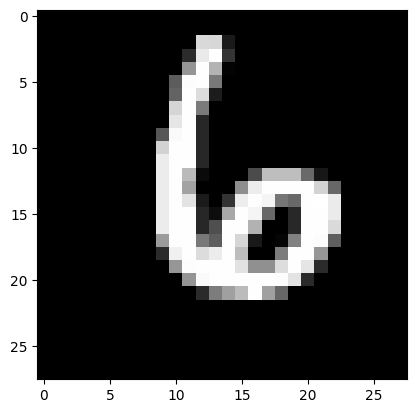

Prediction:  [9]
Label:  9


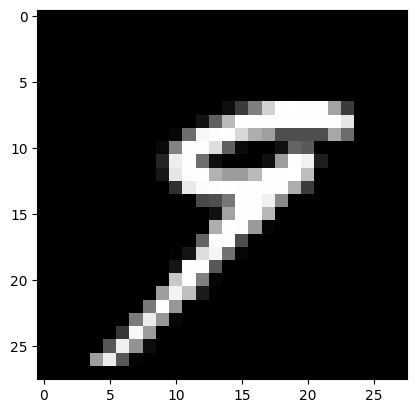

Prediction:  [0]
Label:  0


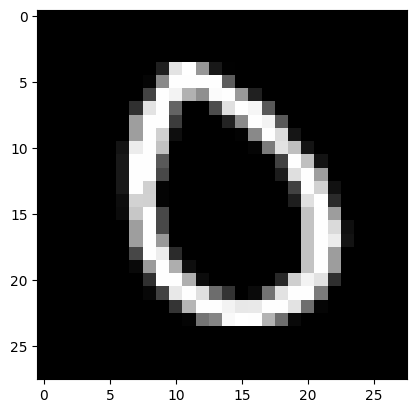

Prediction:  [1]
Label:  1


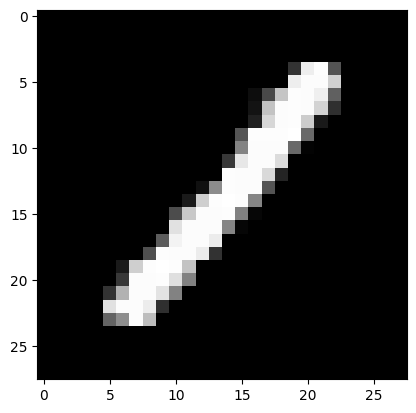

In [35]:
# Test the network on the first four training examples
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

## 🖼️ Visualizing Some Predictions

Let’s see how our network **performs on a few individual digits** from the training set.  

Each cell shows:  
- The network’s predicted digit.  
- The true label.  
- A grayscale image of the digit itself.  

Basically, it’s the network showing off its homework. 👀✏️


In [39]:
# Predict on the development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

# Compute accuracy on the dev set
get_accuracy(dev_predictions, Y_dev)


[9 0 8 3 5 6 4 1 7 6 3 3 6 7 8 3 3 4 0 0 0 9 0 9 4 7 6 2 8 7 8 9 2 8 3 9 2
 6 9 5 1 7 8 7 1 2 1 0 7 5 7 0 7 0 6 0 4 9 4 8 3 1 7 7 8 4 4 2 7 3 4 4 2 2
 5 4 3 8 1 3 2 0 8 8 7 1 4 0 6 3 4 9 1 2 8 1 5 0 1 7 1 4 5 9 9 3 3 6 3 0 0
 7 7 7 3 9 8 7 3 0 3 5 8 0 2 3 4 8 5 5 5 1 3 7 2 0 0 7 4 2 9 0 2 5 2 8 8 0
 4 9 1 2 6 4 8 7 8 2 7 5 0 0 7 8 3 2 4 0 0 4 1 8 5 1 4 1 0 0 8 0 4 8 1 7 7
 9 2 2 7 1 3 8 8 4 6 7 2 4 4 5 7 5 8 3 1 2 8 6 5 4 0 2 5 2 3 4 0 2 6 9 9 3
 6 3 9 9 7 2 6 9 5 9 6 4 0 9 0 7 8 2 9 3 3 5 5 6 7 2 9 5 7 8 4 7 1 1 9 9 6
 8 2 5 5 9 0 6 8 3 1 4 6 7 8 1 4 6 8 9 5 5 4 0 1 3 5 8 6 4 5 7 3 7 8 1 6 9
 7 0 3 5 6 1 8 2 0 6 4 2 0 5 8 6 6 2 7 1 1 2 1 8 4 0 1 6 7 4 9 2 7 6 4 9 4
 6 9 0 3 0 9 5 7 6 4 4 3 5 1 0 5 9 8 6 9 8 1 9 9 6 1 3 3 9 1 1 9 4 6 9 7 8
 7 9 5 3 2 4 1 6 9 9 8 3 0 8 4 4 7 8 6 8 3 3 8 8 1 4 3 9 3 2 2 0 2 8 1 2 2
 6 9 2 6 0 7 8 5 5 3 2 8 5 4 5 2 3 5 6 8 5 8 0 1 8 4 2 8 3 6 2 1 5 3 1 4 9
 8 0 8 8 5 9 5 5 5 0 3 7 0 2 3 2 3 4 5 3 2 8 9 9 2 1 0 3 5 2 3 6 9 8 0 0 6
 1 5 5 0 2 0 7 2 5 9 8 7 

np.float64(0.84)

## 🧪 Evaluating on the Development Set

Finally, we check how well our trained network generalizes to unseen examples (the dev set):  

- `make_predictions(X_dev, W1, b1, W2, b2)` → get predictions for all dev examples.  
- `get_accuracy(dev_predictions, Y_dev)` → compute the overall accuracy.  

This gives a sense of **real-world performance**: how good is our network at recognizing digits it hasn’t seen before? 🔍
